In [2]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 77.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 79.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 71.2 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Attempting uninstall: scipym━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/5 [numpy]
    Found existing installation: scipy 1.15.3━━━━━━━━━━━━━━━━━ 1/5 [numpy]
    Uninstalling scipy-1.15.3:━━╺━━━━━━━━━━━━━━━ 3/5 [scipy]
      Successfully uninstalled scipy-1.15.3━━━━━━━━━━━━━━━ 3/5 [scipy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [gensim]2m4/5 [gensim]


In [1]:
import gensim.downloader as api
import numpy as np
from sklearn.cluster import DBSCAN
import hdbscan
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

wv = api.load('word2vec-google-news-300')
# wv = api.load("fasttext-wiki-news-subwords-300")

In [1]:
# do dbscan clustering with wv similarity distance
with open("./nounlist.txt", "r") as f:
    all_words = f.read().splitlines()[:10000]
all_words = [word for word in all_words if word in wv]

# nb_to_extend = 3

# # Filter your list to only include words present in the model's vocabulary

# new_all_words = []
# for word in tqdm(all_words):
#     new_all_words.append(word)
#     similar_words = wv.similar_by_word(word, topn=nb_to_extend)
#     new_all_words.extend([w for w, _ in similar_words if w not in new_all_words])
# all_words = list(set(new_all_words))  # Remove duplicates



NameError: name 'wv' is not defined

In [2]:
# # with open("./nounlist_enhanced.txt", "w") as f:
# #     for word in all_words:
# #         f.write(word + "\n")

# with open("./nounlist_enhanced.txt", "r") as f:
#     all_words = f.read().splitlines()

In [4]:
from sklearn.decomposition import PCA, IncrementalPCA
X = np.array([wv[word] for word in all_words])
X = PCA(n_components=64).fit_transform(X)

In [ ]:
# Create a matrix of word vectors
# X = np.array([wv[word] for word in all_words])
# Compute the cosine similarity matrix
print("Computing cosine similarity matrix...")
# Perform HDBSCAN clustering
hac = hdbscan.HDBSCAN(min_cluster_size=5, metric='precomputed', max_cluster_size=50)
# Convert similarity to distance
similarity_matrix = cosine_similarity(X)
distance_matrix = similarity_matrix
distance_matrix = 1 - distance_matrix  # Convert similarity to distance
distance_matrix = np.clip(distance_matrix, 0, 1)  # Ensure values are in [0, 1]
distance_matrix = distance_matrix.astype(np.float64)  # Convert to float64 for HDBSCAN
# Fit the model
print("Fitting HDBSCAN model...")
labels = hac.fit_predict(distance_matrix)
# Print the number of clusters found
print(f"Number of clusters found: {len(set(labels)) - (1 if -1 in labels else 0)}")


# print clusters
clusters = {}
for cluster_id in set(labels):
    if cluster_id == -1:
        continue  # Skip noise points
    cluster_words = [all_words[i] for i in range(len(all_words)) if labels[i] == cluster_id]
    clusters[cluster_id] = cluster_words
for cluster_id, words in clusters.items():
    print(f"Cluster {cluster_id}: {', '.join(words)}")
    


Computing cosine similarity matrix...
Fitting HDBSCAN model...
Number of clusters found: 58
Cluster 0: TV, broadcast, media, television, video
Cluster 1: butler, countess, king, princess, queen
Cluster 2: blizzard, cyclone, earthquake, hurricane, rain, rainstorm, rainy, sleet, snow, snowstorm, storm, thunderstorm, tsunami, typhoon, weather, winter
Cluster 3: diner, dining, restaurant, waiter, waitress
Cluster 4: demon, god, hellcat, temptress, thug, vixen
Cluster 5: blade, gun, hacksaw, handgun, handsaw, knife, mattock, pistol, pliers, rifle, scissors, screwdriver, weeder
Cluster 6: freight, rail, streetcar, tram, transit, transport, trolley
Cluster 7: SUV, bus, car, minibus, motorcycle, scooter, taxi, truck, van, vehicle
Cluster 8: availability, creation, development, expansion, growth, implementation, integration, standardization, transformation, utilization
Cluster 9: adjective, adverb, comma, hyphenation, neologism, noun, phrase, pronoun, punctuation, semicolon, synonym, verb
Clust

In [12]:
# from tqdm import tqdm
# enhanced_clusters = {}
# for cluster_id, words in tqdm(clusters.items()):
#     if len(words) > 1:
#         # Calculate the centroid of the cluster
#         new_words = []
#         for word in words:
#             new_words.append(word)
#             similar_words = wv.similar_by_word(word, topn=5)
#             # similar_words = [(w, s) for w, s in similar_words if w in all_words]
#             # print(f"Word: {word}, Similar Words: {similar_words}")
#             new_words.extend([w for w, _ in similar_words if w not in new_words])
#         new_words = list(set(new_words))  # Remove duplicates
        
#         enhanced_clusters[cluster_id] = new_words
enhanced_clusters = clusters

In [13]:
for cluster_id, data in enhanced_clusters.items():
    print(f"Cluster {cluster_id}:")
    print(f"  Words: {', '.join(data)}")

Cluster 0:
  Words: TV, broadcast, media, television, video
Cluster 1:
  Words: butler, countess, king, princess, queen
Cluster 2:
  Words: blizzard, cyclone, earthquake, hurricane, rain, rainstorm, rainy, sleet, snow, snowstorm, storm, thunderstorm, tsunami, typhoon, weather, winter
Cluster 3:
  Words: diner, dining, restaurant, waiter, waitress
Cluster 4:
  Words: demon, god, hellcat, temptress, thug, vixen
Cluster 5:
  Words: blade, gun, hacksaw, handgun, handsaw, knife, mattock, pistol, pliers, rifle, scissors, screwdriver, weeder
Cluster 6:
  Words: freight, rail, streetcar, tram, transit, transport, trolley
Cluster 7:
  Words: SUV, bus, car, minibus, motorcycle, scooter, taxi, truck, van, vehicle
Cluster 8:
  Words: availability, creation, development, expansion, growth, implementation, integration, standardization, transformation, utilization
Cluster 9:
  Words: adjective, adverb, comma, hyphenation, neologism, noun, phrase, pronoun, punctuation, semicolon, synonym, verb
Cluster

In [14]:
# print count of words in each cluster
for cluster_id, words in enhanced_clusters.items():
    print(f"Cluster {cluster_id} has {len(words)} words.")

Cluster 0 has 5 words.
Cluster 1 has 5 words.
Cluster 2 has 16 words.
Cluster 3 has 5 words.
Cluster 4 has 6 words.
Cluster 5 has 13 words.
Cluster 6 has 7 words.
Cluster 7 has 10 words.
Cluster 8 has 10 words.
Cluster 9 has 12 words.
Cluster 10 has 8 words.
Cluster 11 has 10 words.
Cluster 12 has 9 words.
Cluster 13 has 8 words.
Cluster 14 has 5 words.
Cluster 15 has 5 words.
Cluster 16 has 28 words.
Cluster 17 has 11 words.
Cluster 18 has 5 words.
Cluster 19 has 5 words.
Cluster 20 has 7 words.
Cluster 21 has 15 words.
Cluster 22 has 5 words.
Cluster 23 has 41 words.
Cluster 24 has 5 words.
Cluster 25 has 36 words.
Cluster 26 has 8 words.
Cluster 27 has 17 words.
Cluster 28 has 11 words.
Cluster 29 has 18 words.
Cluster 30 has 5 words.
Cluster 31 has 6 words.
Cluster 32 has 6 words.
Cluster 33 has 20 words.
Cluster 34 has 5 words.
Cluster 35 has 8 words.
Cluster 36 has 28 words.
Cluster 37 has 11 words.
Cluster 38 has 5 words.
Cluster 39 has 5 words.
Cluster 40 has 7 words.
Cluster 4

In [14]:
import pickle
with open("enhanced_clusters.pkl", "wb") as f:
    pickle.dump(enhanced_clusters, f)

In [18]:
# count all words in enhanced clusters
all_words_count = sum(len(words) for words in enhanced_clusters.values())
print(f"Total words in enhanced clusters: {all_words_count}")

Total words in enhanced clusters: 9910


In [15]:
from sklearn.metrics.pairwise import cosine_similarity
# --- Method 1: Intra-Cluster Coherence ---
import numpy as np
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations


In [30]:
def find_relevant_clusters(cluster_id):
    all_words = enhanced_clusters[cluster_id]
    all_diff_vectors = []
    for w1 in all_words:
        for w2 in all_words:
            if w1 != w2:
                diff_vector = wv[w1] - wv[w2]
                all_diff_vectors.append(
                    {
                        "word1": w1,
                        "word2": w2,
                        "vector": diff_vector 
                    }
                )

    # do dbscan clustering with all_diff_vectors
    # hac = DBSCAN(eps=0.2, min_samples=5, metric='cosine')
    hac = hdbscan.HDBSCAN(min_cluster_size=5, metric='precomputed')
    similarity_matrix = cosine_similarity([vec["vector"] for vec in all_diff_vectors])
    distance_matrix = similarity_matrix
    distance_matrix = 1 - distance_matrix  # Convert similarity to distance
    distance_matrix = np.clip(distance_matrix, 0, 1)  # Ensure values are in [0, 1]
    distance_matrix = distance_matrix.astype(np.float64)  # Convert to float64 for HDBSCAN

    hac.fit(distance_matrix)
    labels = hac.labels_
    # print(f"Number of clusters found: {len(set(labels)) - (1 if -1 in labels else 0)}")
    cur_clusters = {}
    for cluster_id in set(labels):
        if cluster_id == -1:
            continue  # Skip noise points
        cur_clusters[cluster_id] = []
        for i, label in enumerate(labels):
            if label == cluster_id:
                cur_clusters[cluster_id].append((all_diff_vectors[i]["word1"], all_diff_vectors[i]["word2"]))
    # for cluster_id, pairs in cur_clusters.items():
    #     print(f"Cluster {cluster_id}:")
    #     for w1, w2 in pairs:
    #         print(f"  {w1} - {w2}")


    # filter unique words
    for cluster_id, data in cur_clusters.items():
        new_data = []
        seen_words = set()
        for w1, w2 in data:
            if w1 not in seen_words and w2 not in seen_words:
                new_data.append((w1, w2))
                seen_words.add(w1)
                seen_words.add(w2)
        cur_clusters[cluster_id] = new_data

    # filter clusters with less than 2 pairs
    cur_clusters = {k: v for k, v in cur_clusters.items() if len(v) > 2}

    # for cluster_id, data in cur_clusters.items():
    #     print(f"Cluster {cluster_id}:")
    #     for w1, w2 in data:
    #         print(f"  {w1} - {w2}")
            
            
            


    def calculate_intra_cluster_coherence(cluster_pairs, model):
        """
        Calculates how similar the relationship vectors in a cluster are to each other.
        A score close to 1.0 means a very consistent relationship.
        """
        diff_vectors = []
        for word1, word2 in cluster_pairs:
            if word1 in model and word2 in model:
                diff_vectors.append(model[word2] - model[word1])

        if len(diff_vectors) < 2:
            return 0.0 # Not enough vectors to compare

        # Calculate the centroid (average vector)
        centroid = np.mean(diff_vectors, axis=0).reshape(1, -1)

        # Calculate cosine similarity of each vector to the centroid
        similarities = cosine_similarity(diff_vectors, centroid)

        return np.mean(similarities)


    # --- Method 2: Word-Level Semantic Coherence ---
    def calculate_word_level_coherence(cluster_pairs, model):
        """
        Calculates if the start words and end words form their own coherent groups.
        Returns two scores: (start_word_coherence, end_word_coherence).
        Scores close to 1.0 are best.
        """
        words_a = [pair[0] for pair in cluster_pairs]
        words_b = [pair[1] for pair in cluster_pairs]

        def get_internal_coherence(words, model):
            vectors = []
            for word in words:
                if word in model:
                    vectors.append(model[word])

            if len(vectors) < 2:
                return 0.0 # Not enough words to compare

            # Calculate average pairwise cosine similarity
            pair_similarities = []
            for v1, v2 in combinations(vectors, 2):
                pair_similarities.append(cosine_similarity(v1.reshape(1,-1), v2.reshape(1,-1))[0][0])
            
            if not pair_similarities:
                return 0.0
                
            return np.mean(pair_similarities)

        coherence_a = get_internal_coherence(words_a, model)
        coherence_b = get_internal_coherence(words_b, model)

        return coherence_a, coherence_b


    # --- Main Execution: Scoring and Filtering ---
    # print("\n--- Scoring Clusters ---")

    scored_clusters = {}
    for cluster_id, pairs in cur_clusters.items():
        score1 = calculate_intra_cluster_coherence(pairs, wv)
        score2a, score2b = calculate_word_level_coherence(pairs, wv)
        scored_clusters[cluster_id] = {
            "pairs": pairs,
            "intra_cluster_coherence": score1,
            "word_level_coherence": (score2a, score2b)
        }
    # return scored_clusters
    #     print(f"Cluster {cluster_id}:")
    #     print(f"  - Intra-Cluster Coherence (Method 1): {score1:.4f}")
    #     print(f"  - Word-Level Coherence (Method 2): (Start: {score2a:.4f}, End: {score2b:.4f})")


    # # --- Example of Filtering ---
    # print("\n--- Filtering for Relevant Clusters ---")

    # Define thresholds based on observed scores
    # These are examples; you will need to tune them.
    INTRA_CLUSTER_THRESHOLD = 0.3
    WORD_LEVEL_THRESHOLD = 0.3

    relevant_clusters = {}
    for cluster_id, scores in scored_clusters.items():
        is_relevant = (
            scores["intra_cluster_coherence"] > INTRA_CLUSTER_THRESHOLD and
            scores["word_level_coherence"][0] > WORD_LEVEL_THRESHOLD and
            scores["word_level_coherence"][1] > WORD_LEVEL_THRESHOLD
        )

        if is_relevant:
            relevant_clusters[cluster_id] = scores
        #     print(f"Cluster {cluster_id} is RELEVANT.")
        # else:
        #     print(f"Cluster {cluster_id} is IGNORED.")
            
    # for cluster_id, data in relevant_clusters.items():
    #     print(f"Cluster {cluster_id}:")
    #     for w1, w2 in data["pairs"]:
    #         print(f"  {w1} - {w2}")
    #     print(f"  Intra-Cluster Coherence: {data['intra_cluster_coherence']:.4f}")
    #     print(f"  Word-Level Coherence: (Start: {data['word_level_coherence'][0]:.4f}, End: {data['word_level_coherence'][1]:.4f})")
    return relevant_clusters
        

In [31]:
out = find_relevant_clusters(1)
# print
for cluster_id, data in out.items():
    print(f"Cluster {cluster_id}:")
    for w1, w2 in data["pairs"]:
        print(f"  {w1} - {w2}")
    print(f"  Intra-Cluster Coherence: {data['intra_cluster_coherence']:.4f}")
    print(f"  Word-Level Coherence: (Start: {data['word_level_coherence'][0]:.4f}, End: {data['word_level_coherence'][1]:.4f})")

In [32]:
out

{}

In [33]:
import json
all_relevant_clusters = []
for i in tqdm(range(len(enhanced_clusters))):
    out = find_relevant_clusters(i)
    # if "pairs" in out:
    new_out = {}
    for k in out.keys():
        new_out[int(k)] = out[k]
        new_out[int(k)]["intra_cluster_coherence"] = float(new_out[int(k)]["intra_cluster_coherence"])
        new_out[int(k)]["word_level_coherence"] = tuple(float(x) for x in new_out[int(k)]["word_level_coherence"])
        all_relevant_clusters.append(new_out[int(k)])
    with open(f"./cluster_{i}_relevant.json", "w") as f:
        json.dump(new_out, f, indent=4)

100%|██████████| 58/58 [00:01<00:00, 35.18it/s]


In [34]:
all_relevant_clusters

[{'pairs': [('blizzard', 'cyclone'),
   ('rain', 'earthquake'),
   ('rainstorm', 'hurricane'),
   ('rainy', 'snowstorm'),
   ('sleet', 'storm'),
   ('snow', 'thunderstorm'),
   ('weather', 'tsunami'),
   ('winter', 'typhoon')],
  'intra_cluster_coherence': 0.5545250773429871,
  'word_level_coherence': (0.4846363067626953, 0.49919915199279785)},
 {'pairs': [('blizzard', 'rain'),
   ('cyclone', 'rainstorm'),
   ('earthquake', 'rainy'),
   ('hurricane', 'sleet'),
   ('snowstorm', 'weather'),
   ('storm', 'snow'),
   ('thunderstorm', 'winter')],
  'intra_cluster_coherence': 0.528479814529419,
  'word_level_coherence': (0.5001299977302551, 0.49143272638320923)},
 {'pairs': [('hellcat', 'god'), ('temptress', 'thug'), ('vixen', 'demon')],
  'intra_cluster_coherence': 0.6609077453613281,
  'word_level_coherence': (0.6043208837509155, 0.3720499277114868)},
 {'pairs': [('blade', 'gun'),
   ('hacksaw', 'handgun'),
   ('handsaw', 'knife'),
   ('mattock', 'pistol'),
   ('pliers', 'rifle')],
  'intr

In [36]:
with open("all_relevant_clusters.json", "w") as f:
    json.dump(all_relevant_clusters, f, indent=4)

In [4]:
# test
pairs =  [

            
            [
                "SUV",
                "bus"
            ],
            [
                "car",
                "minibus"
            ],
            [
                "motorcycle",
                "taxi"
            ],
            [
                "scooter",
                "truck"
            ]


        ]
vecs = [wv[pair[1]] - wv[pair[0]] for pair in pairs]
mean_vec = np.mean(vecs, axis=0)
word = "television"
wv.similar_by_vector(wv[word] + mean_vec)

[('television', 0.7814388871192932),
 ('TV', 0.7263067960739136),
 ('broadcast', 0.5718210935592651),
 ('televison', 0.5635806918144226),
 ('broadcasting', 0.5593194961547852),
 ('Television', 0.5557685494422913),
 ('Lebanon_Al_Manar', 0.5409144163131714),
 ('televsion', 0.5392729640007019),
 ('broadcaster', 0.5310707688331604),
 ('channel_ATN_Bangla', 0.5288429260253906)]

In [57]:
wv.similar_by_word("wind")

[('winds', 0.7204776406288147),
 ('Wind', 0.6752252578735352),
 ('paupers_graves_Xicotencatl', 0.6299487948417664),
 ('gusts', 0.5962637066841125),
 ('Winds', 0.594899594783783),
 ('breeze', 0.592047929763794),
 ('northwesterly_wind', 0.5902013182640076),
 ('wind_blows', 0.5894188284873962),
 ('breezes', 0.5883914232254028),
 ('southwesterly_wind', 0.5843492150306702)]

# attribute meaning to clusters

In [1]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
from google import genai
import os
from pydantic import BaseModel, Field

client = genai.Client(api_key=os.getenv("GEMINI_API_KEY"))
model = "gemini-2.5-pro"

In [19]:
class Response(BaseModel):
    thinking: str = Field(..., description="Your reasoning process")
    final_answer: str = Field(..., description="Your final answer to the question")
    
prompt_template = """
I've calculated the difference between the word embedding of a large corpus and now I have these pairs that have a similar direction. Help me find some meaning to the directions of this cluster.
Your final answer should be a very short description of the cluster direction.
Their may be outliers in the pairs, so focus on the most common direction.
If you find that the pairs are not related, you can say "no relation" in your final answer.

Cluster directions:
{pairs}
""".strip()

def format_prompt(pairs):
    pairs_str = "\n".join([f"Pair {idx+1}: {pair[0]} -> {pair[1]}" for idx, pair in enumerate(pairs)])
    return prompt_template.format(pairs=pairs_str)

def get_cluster_meaning(pairs):
    prompt = format_prompt(pairs)
    response = client.models.generate_content(
        model=model,
        contents=prompt,
        config = {
            "response_mime_type": "application/json",
            "response_schema" : Response,
            "system_instruction": "You are a helpful assistant expert in understanding word relationships and clusters. Your task is to analyze the provided pairs of words and provide a concise description of the cluster direction.",
        }
    )
    return response

In [24]:
def get_cluster_meaning_wrapper(cluster):
    pairs = cluster["pairs"]
    response = get_cluster_meaning(pairs)
    cluster["meaning"] = response.parsed.final_answer
    cluster["thinking"] = response.parsed.thinking
    return cluster

In [25]:
from multiprocessing import Pool
from tqdm import tqdm
import json

with open("./all_relevant_clusters.json", "r") as f:
    all_relevant_clusters = json.load(f)


with Pool(20) as p:
    all_relevant_clusters_with_meaning = list(tqdm(p.imap(get_cluster_meaning_wrapper, all_relevant_clusters), total=len(all_relevant_clusters)))

100%|██████████| 90/90 [01:26<00:00,  1.04it/s]


In [26]:
with open("all_relevant_clusters_with_meaning.json", "w") as f:
    json.dump(all_relevant_clusters_with_meaning, f, indent=4)

In [28]:
for cluster in all_relevant_clusters_with_meaning:
    print(f"{cluster['meaning']}")

Weather phenomenon to natural disaster
From a specific storm to a related weather phenomenon
From a negative female archetype to a male archetype
Hand tool to firearm
Weapon to hand tool
General transport concepts to specific rail elements
From a specific mode of transport to its general purpose.
From private to commercial/public transport
From larger to smaller vehicles
From specific processes to broader concepts of growth
From process to expansion
From concept to execution
Shift between grammatical concepts
From parts of speech to punctuation.
Warfare and political violence
From specific military actions to broader concepts of state expansion and war.
From one medical profession to another
From therapeutic or psychological professions to medical professions
From metals and minerals to fossil fuels
Energy resource to mineral resource
From a geometric shape or component to a physical object or tool.
Object to its geometry or associated tool
From central or large body parts to periphera

# tests

In [ ]:
# test
# female to male relative
pairs =  [
            [
                "aunt",
                "brother"
            ],
            [
                "grandma",
                "daughter"
            ],
            [
                "grandmother",
                "nephew"
            ]
        ]
vecs = [wv[pair[1]] - wv[pair[0]] for pair in pairs]
mean_vec = np.mean(vecs, axis=0)
word = "daughter"
wv.similar_by_vector(wv[word] + mean_vec)

[('queen', 0.8046911358833313),
 ('king', 0.6057471036911011),
 ('queens', 0.5859329104423523),
 ('princess', 0.5606282353401184),
 ('monarch', 0.5496602058410645),
 ('prince', 0.5450401902198792),
 ('Makobo_Modjadji', 0.5060423612594604),
 ('prince_consort', 0.5032263994216919),
 ('royal', 0.5001659393310547),
 ('princes', 0.4863908290863037)]

In [18]:
wv.similar_by_word(word)

[('queens', 0.739944338798523),
 ('princess', 0.7070532441139221),
 ('king', 0.6510956883430481),
 ('monarch', 0.6383602023124695),
 ('very_pampered_McElhatton', 0.6357026696205139),
 ('Queen', 0.6163407564163208),
 ('NYC_anglophiles_aflutter', 0.6060680150985718),
 ('Queen_Consort', 0.5923796892166138),
 ('princesses', 0.5908074975013733),
 ('royal', 0.5637185573577881)]

In [19]:
# test
pairs =  [

            

            [
                "blizzard",
                "cyclone"
            ],
            [
                "rain",
                "earthquake"
            ],
            [
                "rainstorm",
                "hurricane"
            ],
            [
                "rainy",
                "snowstorm"
            ],
            [
                "sleet",
                "storm"
            ],
            [
                "snow",
                "thunderstorm"
            ],
            [
                "weather",
                "tsunami"
            ],
            [
                "winter",
                "typhoon"
            ]
        
        ]
vecs = [wv[pair[1]] - wv[pair[0]] for pair in pairs]
mean_vec = np.mean(vecs, axis=0)
word = "wind"
wv.similar_by_vector(wv[word] + mean_vec)

[('wind', 0.7509654760360718),
 ('cyclone', 0.6039589047431946),
 ('typhoon', 0.6032367944717407),
 ('winds', 0.5877481698989868),
 ('hurricane', 0.5860252380371094),
 ('storm', 0.5791043043136597),
 ('Wind', 0.5333985686302185),
 ('storms', 0.5293585062026978),
 ('tsunami', 0.529338538646698),
 ('Hurricane_Ike', 0.5260397791862488)]

In [20]:
wv.similar_by_word(word)

[('winds', 0.7204776406288147),
 ('Wind', 0.6752252578735352),
 ('paupers_graves_Xicotencatl', 0.6299487948417664),
 ('gusts', 0.5962637066841125),
 ('Winds', 0.594899594783783),
 ('breeze', 0.592047929763794),
 ('northwesterly_wind', 0.5902013182640076),
 ('wind_blows', 0.5894188284873962),
 ('breezes', 0.5883914232254028),
 ('southwesterly_wind', 0.5843492150306702)]

In [2]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, cosine_similarity

In [19]:
with open("./top1000_nouns.txt", "r") as f:
    all_words = f.read().splitlines()
all_words = all_words[500:600]


In [4]:
from tqdm import tqdm

In [85]:
all_distances = []
for w1 in tqdm(all_words):
    for w2 in all_words:
        if w1 != w2:
            try:
                vec1 = wv[w1]
                vec2 = wv[w2]
                direction = vec1 - vec2
                all_distances.append({
                    "word1": w1,
                    "word2": w2,
                    "direction": direction,
                })
            except KeyError:
                continue

100%|██████████| 100/100 [00:00<00:00, 2925.98it/s]


In [ ]:
# find similar directions
from sklearn.metrics.pairwise import cosine_similarity
similarities = []
for i in tqdm(range(len(all_distances))):
    for j in range(i + 1, len(all_distances)):
        vec1 = all_distances[i]["direction"]
        vec2 = all_distances[j]["direction"]
        sim = cosine_similarity([vec1], [vec2])[0][0]
        if sim > 0.9:
            similarities.append({
                "word1": all_distances[i]["word1"],
                "word2": all_distances[i]["word2"],
                "word3": all_distances[j]["word1"],
                "word4": all_distances[j]["word2"],
                "similarity": sim,
            })
            print(f"Found similar directions: {all_distances[i]['word1']} - {all_distances[i]['word2']} and {all_distances[j]['word1']} - {all_distances[j]['word2']} with similarity {sim}")

In [28]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations

# --- Step 1: Generate all pairs and direction vectors efficiently ---
# Create all unique word pairs
word_pairs = list(combinations(all_words, 2))

# Create a list to hold the pairs we can find vectors for
valid_pairs = []
direction_vectors = []

for w1, w2 in word_pairs:
    try:
        direction = wv[w1] - wv[w2]
        valid_pairs.append((w1, w2))
        direction_vectors.append(direction)
    except KeyError:
        continue

# Convert the list of vectors into a single NumPy matrix
direction_matrix = np.array(direction_vectors)

# --- Step 2: Compute all-pairs cosine similarity in one go ---
# This is the key optimization. It calculates the similarity between
# every vector and every other vector in a highly optimized operation.
print("Calculating similarity matrix...")
# The result is a massive matrix where sim_matrix[i, j] is the
# similarity between direction i and direction j.
sim_matrix = cosine_similarity(direction_matrix)

# --- Step 3: Find pairs with similarity above the threshold ---
# Use np.where to find indices of similarities > 0.9.
# We use np.triu_indices to only check the upper triangle of the matrix,
# avoiding duplicate pairs (i,j) and self-comparisons (i,i).
threshold = 0.5
upper_triangle_indices = np.triu_indices(len(valid_pairs), k=1)
similar_indices = np.where(sim_matrix[upper_triangle_indices] > threshold)

# Get the actual indices from the upper triangle
indices_i = upper_triangle_indices[0][similar_indices]
indices_j = upper_triangle_indices[1][similar_indices]

print(f"\nFound {len(indices_i)} similar direction pairs:")
# --- Step 4: Map indices back to words ---
all_similar_pairs = []
for i, j in zip(indices_i, indices_j):
    pair1 = valid_pairs[i] # (w1, w2)
    pair2 = valid_pairs[j] # (w3, w4)
    sim = sim_matrix[i, j]
    all_similar_pairs.append((
        pair1[0], pair1[1], pair2[0], pair2[1], sim
    ))
    # print(
    #     f"'{pair1[0]}-{pair1[1]}' is similar to '{pair2[0]}-{pair2[1]}' "
    #     f"(Similarity: {sim:.4f})"
    # )

Calculating similarity matrix...

Found 148266 similar direction pairs:


In [29]:
len(all_similar_pairs)

148266

In [30]:
def all_words_are_different(word_list):
    seen = set()
    for word in word_list:
        if word in seen:
            return False
        seen.add(word)
    return True

In [31]:
all_similar_pairs_different = [
    (w1, w2, w3, w4, sim)
    for w1, w2, w3, w4, sim in all_similar_pairs
    if all_words_are_different([w1, w2, w3, w4])
]

In [32]:
len(all_similar_pairs_different)

1040

In [33]:
all_similar_pairs_different

[('henry', 'telephone', 'japan', 'phone', 0.6062002),
 ('henry', 'telephone', 'tv', 'phone', 0.5350852),
 ('henry', 'phone', 'japan', 'telephone', 0.5541895),
 ('henry', 'phone', 'tv', 'telephone', 0.51272345),
 ('henry', 'prison', 'japan', 'sentence', 0.5687018),
 ('henry', 'prison', 'tv', 'sentence', 0.54002804),
 ('henry', 'sentence', 'japan', 'prison', 0.5568015),
 ('henry', 'sentence', 'tv', 'prison', 0.5374176),
 ('match', 'telephone', 'football', 'phone', 0.5486685),
 ('match', 'telephone', 'stuff', 'phone', 0.503433),
 ('match', 'telephone', 'introduction', 'phone', 0.50505674),
 ('match', 'telephone', 'play', 'phone', 0.6499466),
 ('match', 'telephone', 'move', 'phone', 0.53714585),
 ('match', 'phone', 'football', 'telephone', 0.56512743),
 ('match', 'phone', 'introduction', 'telephone', 0.5022515),
 ('match', 'phone', 'play', 'telephone', 0.6305631),
 ('match', 'prison', 'play', 'sentence', 0.5654481),
 ('match', 'sentence', 'football', 'prison', 0.53890437),
 ('match', 'sent

In [34]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 27.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=522319 sha256=50421dd4bf8c0d495780350a463aab52017a22b6f0285b9cbdb8bb1bfb4a9763
  Stored in directory: /home/codespace/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [ ]:
import numpy as np
from annoy import AnnoyIndex
from itertools import combinations

with open("./top1000_nouns.txt", "r") as f:
    all_words = f.read().splitlines()

# --- Step 1 is the same: Generate pairs and direction vectors ---
word_pairs = list(combinations(all_words, 2))
valid_pairs = []
direction_vectors = []
for w1, w2 in word_pairs:
    try:
        direction = wv[w1] - wv[w2]
        # Normalize the vector for cosine similarity search
        norm = np.linalg.norm(direction)
        if norm > 0:
            valid_pairs.append((w1, w2))
            direction_vectors.append(direction / norm)
    except KeyError:
        continue

# --- Step 2: Build the ANN index ---
vector_dim = wv.vector_size
# 'angular' is used for cosine similarity
ann_index = AnnoyIndex(vector_dim, 'angular')

for i, vec in enumerate(direction_vectors):
    ann_index.add_item(i, vec)

# Build the index (the more trees, the higher the precision)
print("Building ANN index...")
ann_index.build(10)



In [53]:
# --- Step 3: Find similar items for each vector ---
threshold = 0.5
found_pairs = set() # To avoid duplicate pairs like (A,B) and (B,A)

print("Searching for similar directions...")
for i in tqdm(range(len(valid_pairs))):
    # Search for the 10 nearest neighbors for item i
    # We get back indices and distances
    neighbors, distances = ann_index.get_nns_by_item(i, 10, include_distances=True)

    for neighbor_idx, dist in zip(neighbors, distances):
        # Skip self-comparison
        if i == neighbor_idx:
            continue

        # Annoy distance is sqrt(2*(1-cos(u,v))), so we convert back
        similarity = 1 - (dist**2) / 2

        if similarity > threshold:
            # Sort indices to avoid duplicates, e.g. (1,5) and (5,1)
            pair_key = tuple(sorted((i, neighbor_idx)))
            if pair_key not in found_pairs:
                pair1 = valid_pairs[i]
                pair2 = valid_pairs[neighbor_idx]
                # print(
                #     f"'{pair1[0]}-{pair1[1]}' is similar to '{pair2[0]}-{pair2[1]}' "
                #     f"(Similarity: {similarity:.4f})"
                # )
                found_pairs.add(pair_key)

Searching for similar directions...


100%|██████████| 486590/486590 [00:31<00:00, 15535.24it/s]


In [42]:
found_pairs = list(found_pairs)

In [54]:
proper_pairs = [
    (valid_pairs[pair[0]], valid_pairs[pair[1]])
    for pair in found_pairs
    if all_words_are_different([valid_pairs[pair[0]][0], valid_pairs[pair[0]][1],
                                valid_pairs[pair[1]][0], valid_pairs[pair[1]][1]])
]

In [55]:
proper_pairs

[(('south', 'acid'), ('north', 'material')),
 (('south', 'respect'), ('east', 'trust')),
 (('woman', 'chief'), ('girl', 'chairman')),
 (('wind', 'element'), ('weather', 'aspect')),
 (('morning', 'quarter'), ('afternoon', 'half')),
 (('south', 'sign'), ('north', 'turn')),
 (('title', 'campaign'), ('crown', 'phase')),
 (('wife', 'trust'), ('daughter', 'respect')),
 (('hour', 'operation'), ('minute', 'effort')),
 (('father', 'union'), ('son', 'strike')),
 (('west', 'republic'), ('east', 'island')),
 (('morning', 'english'), ('afternoon', 'taylor')),
 (('man', 'relationship'), ('woman', 'partnership')),
 (('west', 'difference'), ('east', 'mistake')),
 (('land', 'chance'), ('property', 'opportunity')),
 (('south', 'balance'), ('east', 'amount')),
 (('north', 'principle'), ('west', 'concept')),
 (('south', 'agent'), ('east', 'client')),
 (('mother', 'woman'), ('son', 'lady')),
 (('week', 'county'), ('weekend', 'parish')),
 (('north', 'base'), ('west', 'field')),
 (('week', 'health'), ('month

In [48]:
idx = 1000
valid_pairs[found_pairs[idx][0]], valid_pairs[found_pairs[idx][1]]

(('interest', 'west'), ('interest', 'east'))

In [64]:
import numpy as np
from annoy import AnnoyIndex
from itertools import combinations
import gensim.downloader as api
from collections import defaultdict

# --- Configuration ---
all_words = [
    'king', 'queen', 'man', 'woman', 'prince', 'princess',
    'north', 'south', 'east', 'west', 'up', 'down',
    'sort', 'kind', 'type', 'style',
    'car', 'cars', 'dog', 'dogs'
]

with open("./top1000_nouns.txt", "r") as f:
    all_words = f.read().splitlines()
    
# NEW: Threshold for considering if two words are related enough to form a direction
WORD_SIMILARITY_THRESHOLD = 0.0 # Tune this value between 0.0 and 1.0

# Previous configuration
DIRECTION_SIMILARITY_THRESHOLD = 0.3
N_TREES = 20
N_NEIGHBORS = 150

# --- Load Pre-trained Model ---
print("Loading word embedding model...")
# wv = api.load('word2vec-google-news-300')
vector_dim = wv.vector_size
print("Model loaded.")

# --- 1. Generate Meaningful Direction Vectors ---
print("Generating direction vectors for RELATED word pairs...")
valid_pairs = []
direction_vectors = []

for w1, w2 in combinations(all_words, 2):
    try:
        # ⭐️ KEY FIX: Only proceed if the words themselves are somewhat similar
        if wv.similarity(w1, w2) > WORD_SIMILARITY_THRESHOLD:
            direction = wv[w1] - wv[w2]
            norm = np.linalg.norm(direction)
            if norm > 0:
                valid_pairs.append((w1, w2))
                direction_vectors.append(direction / norm)
    except KeyError:
        continue

# --- Steps 2, 3, and 4 are the same as before ---

# 2. Build the ANN Index
print(f"Building ANN index for {len(direction_vectors)} vectors...")
ann_index = AnnoyIndex(vector_dim, 'angular')
for i, vec in enumerate(direction_vectors):
    ann_index.add_item(i, vec)
ann_index.build(N_TREES)
print("Index built.")

# 3. Find and Group Similar Vectors into Clusters
print("Clustering similar directions...")
clusters = []
visited_indices = set()

for i in range(len(valid_pairs)):
    if i in visited_indices:
        continue

    current_cluster_indices = set()
    queue = [i]
    visited_indices.add(i)

    while queue:
        current_idx = queue.pop(0)
        current_cluster_indices.add(current_idx)
        neighbors, distances = ann_index.get_nns_by_item(current_idx, N_NEIGHBORS, include_distances=True)
        for neighbor_idx, dist in zip(neighbors, distances):
            if neighbor_idx in visited_indices:
                continue
            similarity = 1 - (dist**2) / 2
            if similarity > DIRECTION_SIMILARITY_THRESHOLD:
                visited_indices.add(neighbor_idx)
                queue.append(neighbor_idx)

    if len(current_cluster_indices) > 1:
        clusters.append(list(current_cluster_indices))

print(f"Discovered {len(clusters)} clusters.")

# 4. Display the Results
clusters.sort(key=len, reverse=True)
print("\n--- Top 5 Largest Clusters Discovered ---")
for i, cluster in enumerate(clusters[:5]):
    print(f"\n## Cluster {i+1} (Size: {len(cluster)})")
    cluster_word_pairs = [valid_pairs[idx] for idx in cluster]
    for pair in cluster_word_pairs[:5]:
        print(f"  > '{pair[0]}' - '{pair[1]}'")

Loading word embedding model...
Model loaded.
Generating direction vectors for RELATED word pairs...
Building ANN index for 432157 vectors...
Index built.
Clustering similar directions...
Discovered 6 clusters.

--- Top 5 Largest Clusters Discovered ---

## Cluster 1 (Size: 432069)
  > 'time' - 'way'
  > 'time' - 'year'
  > 'time' - 'work'
  > 'time' - 'government'
  > 'time' - 'day'

## Cluster 2 (Size: 4)
  > 'west' - 'east'
  > 'south' - 'east'
  > 'north' - 'east'
  > 'south' - 'west'

## Cluster 3 (Size: 2)
  > 'rain' - 'snow'
  > 'rain' - 'weather'

## Cluster 4 (Size: 2)
  > 'dinner' - 'breakfast'
  > 'dinner' - 'lunch'

## Cluster 5 (Size: 2)
  > 'dinner' - 'meal'
  > 'lunch' - 'meal'


In [71]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [python-Levenshtein]


In [14]:
import numpy as np
import gensim.downloader as api
from sklearn.cluster import DBSCAN
from collections import defaultdict
import Levenshtein # For calculating edit distance

# --- 1. SETUP: Load Model and Define Words ---

# Load a pre-trained Word Embedding model (e.g., GloVe)
# This might take a few minutes on the first run as it downloads the model
print("Loading pre-trained GloVe model...")
# model = api.load("glove-wiki-gigaword-100")
print("Model loaded.")

# Your list of words
# NOTE: For meaningful results, this list should be much larger (thousands of words).
all_words = [
    'king', 'kings', 'queen', 'queens', 'prince', 'princes',
    'dog', 'dogs', 'cat', 'cats', 'car', 'cars',
    'walk', 'walked', 'walking', 'talk', 'talked', 'talking',
    'quick', 'quicker', 'quickly', 'slow', 'slower', 'slowly'
]

with open("./top1000_nouns.txt", "r") as f:
    all_words = f.read().splitlines()[:10]

# Filter your list to only include words present in the model's vocabulary
all_words = [word for word in all_words if word in wv]


# --- 2. GENERATE CANDIDATE PAIRS & VECTORS ---

# We'll generate pairs based on small morphological changes (edit distance)
# and store their difference vectors.
candidate_pairs = []
difference_vectors = []

print(f"Generating candidate pairs from {len(all_words)} words...")
for word1 in all_words:
    for word2 in all_words:
        if word1 == word2:
            continue
        
        # Heuristic: Find pairs with a small edit distance (likely grammatical relatives)
        # Get their vectors from the model
        # Get their vectors from the model
        vec1 = wv[word1]
        vec2 = wv[word2]
        
        diff = vec2 - vec1

        # Calculate and store the difference vector
        norm = np.linalg.norm(diff)
        if norm > 0:
            difference_vectors.append(diff / norm)
            candidate_pairs.append((word1, word2))
# Convert the list of vectors to a NumPy array for scikit-learn
X = np.array(difference_vectors)

# do pca
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X = pca.fit_transform(X)

print(f"Generated {len(X)} difference vectors.")


Loading pre-trained GloVe model...
Model loaded.
Generating candidate pairs from 10 words...
Generated 90 difference vectors.


In [15]:
from sklearn.cluster import AgglomerativeClustering
# ... setup is the same as for K-Means

# Perform hierarchical clustering
# n_clusters can be set to None if you want to explore the full tree
hac = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = hac.fit_predict(X)

In [17]:
len(X)

90

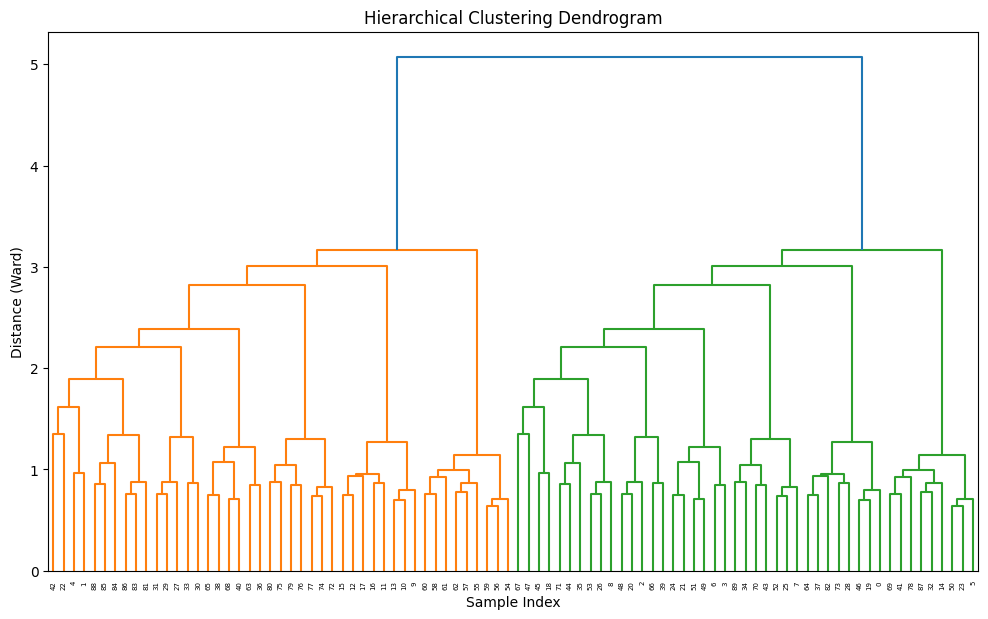

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X, method='ward')

# 2. Plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward)')
plt.savefig("dendrogram.png")

In [ ]:


# --- 3. RUN DBSCAN CLUSTERING ---

# DBSCAN groups together vectors that are closely packed together.
# **Key Parameters to Tune:**
#   eps: The maximum distance for two vectors to be considered neighbors. This is the most
#        important parameter. A good starting point is often the "elbow" in a k-distance graph.
#   min_samples: The minimum number of vectors required to form a dense region (a cluster).
print("Running DBSCAN clustering...")
db = DBSCAN(eps=0.15, min_samples=10, metric='cosine').fit(X)

# The 'labels_' attribute contains the cluster assignment for each vector.
# Label -1 is for noise (vectors that didn't belong to any cluster).
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Found {n_clusters} clusters (plus noise).")


# --- 4. INTERPRET THE CLUSTERS ---

# Group the original word pairs by their assigned cluster label.
clusters = defaultdict(list)
for i, label in enumerate(labels):
    # We ignore the noise cluster (-1)
    if label != -1:
        clusters[label].append(candidate_pairs[i])

# Print the contents of the discovered clusters for human interpretation
print("\n--- Discovered Clusters ---")
for cluster_id, pairs in clusters.items():
    print(f"\n[Cluster {cluster_id}]")
    # Print up to 10 example pairs from the cluster
    for pair in pairs[:10]:
        print(f"  {pair[0]} -> {pair[1]}")

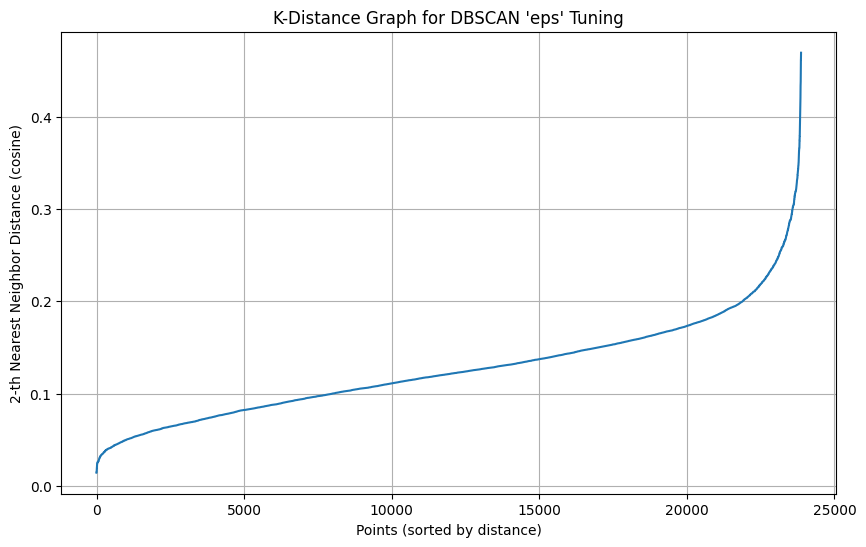

In [39]:

from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# The value for k should be the same as your 'min_samples' setting for DBSCAN.
# Let's use min_samples = 2 as in the original code.
k = 2
nbrs = NearestNeighbors(n_neighbors=k, metric='cosine').fit(X)
distances, indices = nbrs.kneighbors(X)

# Get the distance to the k-th neighbor (the last column of the distances array)
# and sort them in ascending order.
k_distances = np.sort(distances[:, -1])

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.xlabel("Points (sorted by distance)")
plt.ylabel(f"{k}-th Nearest Neighbor Distance (cosine)")
plt.title("K-Distance Graph for DBSCAN 'eps' Tuning")
plt.grid(True)
plt.show()